In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import numpy as np
import tensorflow as tf
import angorapy as apy

env = apy.make_env("LunarLanderContinuous-v2")
distribution = apy.policies.BetaPolicyDistribution(env)

Invalid MIT-MAGIC-COOKIE-1 key

In [2]:
from tensorflow.keras.layers import TimeDistributed
from angorapy.utilities.util import env_extract_dims


def build_my_amazing_model(env, distribution, bs=1, sequence_length=1):
    state_dimensionality, n_actions = env_extract_dims(env)

    inputs = tf.keras.Input(batch_shape=(bs, sequence_length,) + state_dimensionality["proprioception"], name="proprioception")
    masked = tf.keras.layers.Masking(batch_input_shape=(bs, sequence_length,) + (inputs.shape[-1], ))(inputs)

    x = TimeDistributed(tf.keras.layers.Dense(32))(masked)
    x = TimeDistributed(tf.keras.layers.Dense(32))(x)

    x, *_ = tf.keras.layers.LSTM(64,
                       stateful=True,
                       return_sequences=True,
                       return_state=True,
                       batch_size=bs,
                       name="policy_recurrent_layer")(x)

    x_policy = tf.keras.layers.Dense(32)(x)
    x_policy = tf.keras.layers.Dense(32)(x_policy)

    x_value = tf.keras.layers.Dense(32)(x)
    x_value = tf.keras.layers.Dense(32)(x_value)

    out_policy = distribution.build_action_head(n_actions, x_policy.shape[1:], bs)(x_policy)
    out_value = tf.keras.layers.Dense(1)(x_value)

    policy = tf.keras.Model(inputs=inputs, outputs=out_policy, name="my_policy_function")
    value = tf.keras.Model(inputs=inputs, outputs=out_value, name="my_value_function")
    joint = tf.keras.Model(inputs=inputs, outputs=[out_policy, out_value], name="my_joint_networks")

    return policy, value, joint


Detected 0 GPU devices.
Using [StateNormalizationTransformer, RewardNormalizationTransformer] for preprocessing.
An MPI Optimizer with 1 ranks has been created; the following ranks optimize: [0]


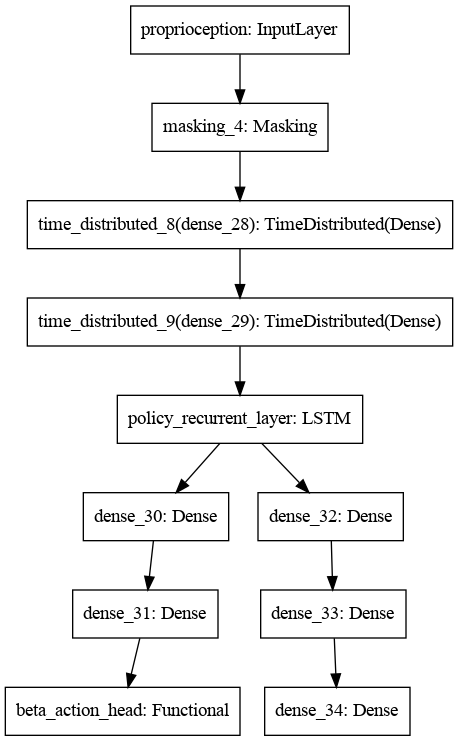

In [10]:
from tensorflow.keras.utils import plot_model

agent = apy.Agent(build_my_amazing_model, env, horizon=2048, workers=12, distribution=distribution)
plot_model(agent.joint)

In [3]:


agent.drill(n=10, epochs=3, batch_size=512)
agent.save_agent_state()

Detected 1 GPU devices.
Using [StateNormalizationTransformer, RewardNormalizationTransformer] for preprocessing.
An MPI Optimizer with 1 ranks has been created; the following ranks optimize: [0]


Drill started using 1 processes for 12 workers of which 1 are optimizers. Worker distribution: [12].
IDs over Workers: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]
IDs over Optimizers: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]]

The policy is recurrent and the batch size is interpreted as the number of transitions per policy update. Given the batch size of 512 this results in: 
	32 chunks per update and 48 updates per epoch
	Batch tilings of (1, 32) per process and (1, 32) in total.


Gathering cycle 0...

Gathering experience...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2048/2048 [00:21<00:00, 93.50it/s]


Before Training: r:  -183.10; len:   107.52; n: 210; loss: [  pi  |  v     |  ent ]; eps:     0; lr: 1.00e-03; upd:      0; f:    0.000k; y.exp: 0.000; w: 0.06; times:  ; took s [unknown time left]; mem: 4.48/33|1.02/8.59;
Optimizing...

Optimizing...:   0%|▎                                                                                                                                                                                           | 144/73728 [01:39<14:11:14,  1.44it/s]


Gathering cycle 1...

Gathering experience...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2048/2048 [00:19<00:00, 104.90it/s]


Cycle     1/10: r:  -143.15; len:   107.05; n: 211; loss: [ -0.30|    0.07| -0.16]; eps:   210; lr: 1.00e-03; upd:    144; f:   24.576k; w: 0.06; times: [241.6|0.0|100.2] [71|0|29]; took 339.96s [51.0mins left]; mem: 4.55/33|1.02/8.59;
Optimizing...

Optimizing...:   0%|▎                                                                                                                                                                                           | 144/73728 [01:40<14:19:19,  1.43it/s]


Gathering cycle 2...

Gathering experience...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2048/2048 [00:19<00:00, 107.76it/s]


Cycle     2/10: r:  -130.56; len:   109.72; n: 203; loss: [ -0.73|    0.02| -0.21]; eps:   421; lr: 1.00e-03; upd:    288; f:   49.152k; w: 0.07; times: [239.6|0.0|101.1] [70|0|30]; took 341.01s [45.4mins left]; mem: 4.57/33|1.02/8.59;
Optimizing...

Optimizing...:   0%|▎                                                                                                                                                                                           | 144/73728 [01:42<14:34:27,  1.40it/s]


Gathering cycle 3...

Gathering experience...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2048/2048 [00:19<00:00, 105.88it/s]


Cycle     3/10: r:  -117.92; len:   112.78; n: 193; loss: [ -0.42|    0.00| -0.23]; eps:   624; lr: 1.00e-03; upd:    432; f:   73.728k; w: 0.06; times: [239.8|0.0|102.9] [70|0|30]; took 343.89s [39.9mins left]; mem: 4.58/33|1.02/8.59;
Optimizing...

Optimizing...:   0%|▎                                                                                                                                                                                           | 144/73728 [01:35<13:29:24,  1.52it/s]


Gathering cycle 4...

Gathering experience...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2048/2048 [00:19<00:00, 102.46it/s]


Cycle     4/10: r:   -86.43; len:   113.51; n: 196; loss: [  0.57|    0.11| -0.26]; eps:   817; lr: 1.00e-03; upd:    576; f:   98.304k; w: 0.06; times: [240.9|0.0|95.2] [72|0|28]; took 335.07s [34.0mins left]; mem: 4.6/33|1.02/8.59;
Optimizing...

Optimizing...:   0%|▎                                                                                                                                                                                           | 144/73728 [01:37<13:50:35,  1.48it/s]


Gathering cycle 5...

Gathering experience...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2048/2048 [00:19<00:00, 103.24it/s]


Cycle     5/10: r:   -67.37; len:   120.80; n: 187; loss: [ -0.20|    0.00| -0.22]; eps:  1013; lr: 1.00e-03; upd:    720; f:  122.880k; w: 0.06; times: [239.7|0.0|97.7] [71|0|29]; took 339.71s [28.3mins left]; mem: 4.61/33|1.02/8.59;
Optimizing...

Optimizing...:   0%|▎                                                                                                                                                                                           | 144/73728 [01:42<14:31:39,  1.41it/s]


Gathering cycle 6...

Gathering experience...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2048/2048 [00:20<00:00, 101.73it/s]


Cycle     6/10: r:   -42.23; len:   153.72; n: 147; loss: [  2.58|    0.54| -0.12]; eps:  1200; lr: 1.00e-03; upd:    864; f:  147.456k; w: 0.04; times: [241.8|0.0|102.5] [70|0|30]; took 353.41s [22.8mins left]; mem: 4.62/33|1.02/8.59;
Optimizing...

Optimizing...:   0%|▎                                                                                                                                                                                           | 144/73728 [01:39<14:09:40,  1.44it/s]


Gathering cycle 7...

Gathering experience...: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2048/2048 [00:20<00:00, 101.06it/s]


Cycle     7/10: r:   -19.19; len:   169.06; n: 127; loss: [  1.42|    0.45| -0.19]; eps:  1347; lr: 1.00e-03; upd:   1008; f:  172.032k; w: 0.04; times: [250.7|0.0|100.0] [71|0|29]; took 356.03s [17.2mins left]; mem: 4.64/33|1.02/8.59;
Optimizing...

Optimizing...:   0%|▎                                                                                                                                                                                           | 144/73728 [01:40<14:14:39,  1.43it/s]


Gathering cycle 8...

Gathering experience...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2048/2048 [00:23<00:00, 87.76it/s]


Cycle     8/10: r:   -18.23; len:   395.12; n:  48; loss: [ -0.38|    0.13| -0.11]; eps:  1474; lr: 1.00e-03; upd:   1152; f:  196.608k; w: 0.02; times: [255.9|0.0|100.5] [72|0|28]; took 385.58s [11.6mins left]; mem: 4.66/33|1.02/8.59;
Optimizing...

Optimizing...:   0%|▎                                                                                                                                                                                           | 144/73728 [01:36<13:41:50,  1.49it/s]


Gathering cycle 9...

Gathering experience...: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2048/2048 [00:23<00:00, 88.85it/s]


Cycle     9/10: r:    42.88; len:   689.14; n:  28; loss: [  0.24|    0.00| -0.26]; eps:  1522; lr: 1.00e-03; upd:   1296; f:  221.184k; w: 0.01; times: [284.9|0.0|96.7] [75|0|25]; took 398.11s [5.9mins left]; mem: 4.67/33|1.02/8.59;
Optimizing...

Optimizing...:   0%|▎                                                                                                                                                                                           | 144/73728 [01:40<14:15:05,  1.43it/s]


Finalizing...Drill finished after 3535.79serialization.


In [ ]:
evaluation_results = agent.evaluate(10, act_confidently=True)[0]
print(f"Mean performance after training: {np.mean(evaluation_results.episode_rewards)}")